In [1]:
from photutils.segmentation import SourceFinder
import matplotlib.pyplot as plt
from astropy.io import fits

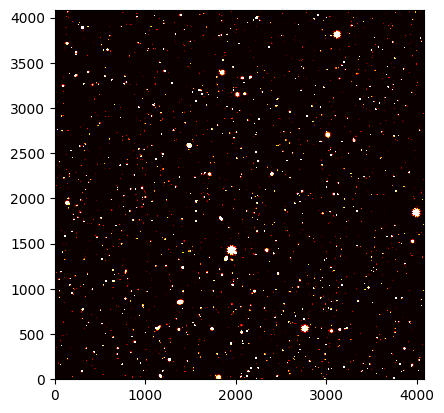

In [2]:
direct_fits = fits.open("/Users/keith/astr/research_astr/grizbox/FOV0/GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits")
direct, header = (direct_fits[1].data, direct_fits[1].header)
plt.imshow(direct, vmin=0.4, vmax=1., cmap='hot', origin='lower')

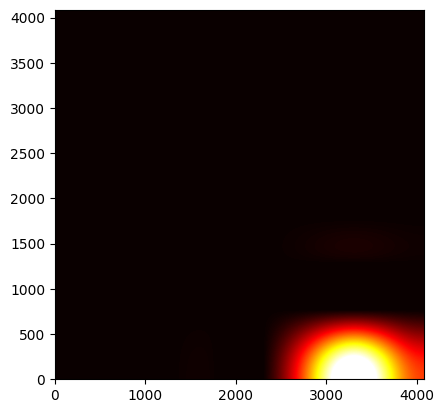

In [3]:
# Measure Background
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()

# direct.shape is (4088, 4088); Larger objects are 30+ pixels; 
# box_size (511, 511) selected as a multiple of 4088 much larger that 30 pixels
# Other box_sizes have background estimates heavily biased by the local large objects
bkg = Background2D(direct, (511,511), filter_size=(3,3), bkg_estimator=bkg_estimator)
plt.imshow(bkg.background, origin='lower', cmap='hot')

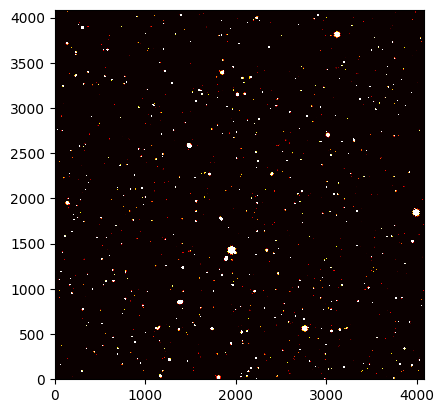

In [4]:
# Subtract Background
direct -= bkg.background
plt.imshow(direct, vmin=0.4, vmax=1., cmap='hot', origin='lower')

In [5]:
# Determine a threshold value
threshold = 2 * bkg.background_rms

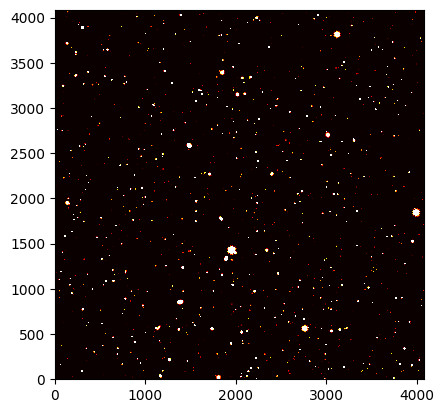

In [6]:
# Convolve data
from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel
kernel = make_2dgaussian_kernel(3.0, 5)
convolved_data = convolve(direct, kernel)
plt.imshow(convolved_data, vmin=0.3, vmax=1., cmap='hot', origin='lower')

Deblending:   0%|          | 0/5808 [00:00<?, ?it/s]

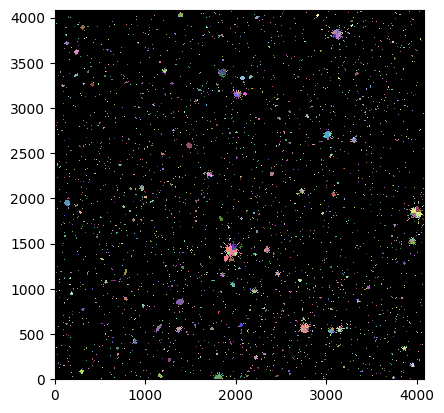

In [7]:
finder = SourceFinder(npixels=7)
found_seg = finder(direct, threshold)
plt.imshow(found_seg, cmap=found_seg.cmap, interpolation='nearest', origin='lower')

Deblending:   0%|          | 0/6281 [00:00<?, ?it/s]

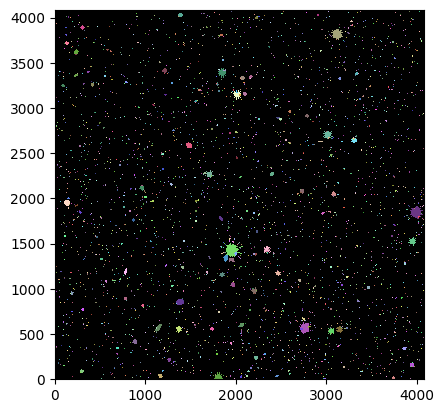

In [9]:
found_convolved_seg = finder(convolved_data, threshold)
plt.imshow(found_convolved_seg, cmap=found_convolved_seg.cmap, interpolation='nearest', origin='lower')

Text(0.5, 1.0, 'Difference')

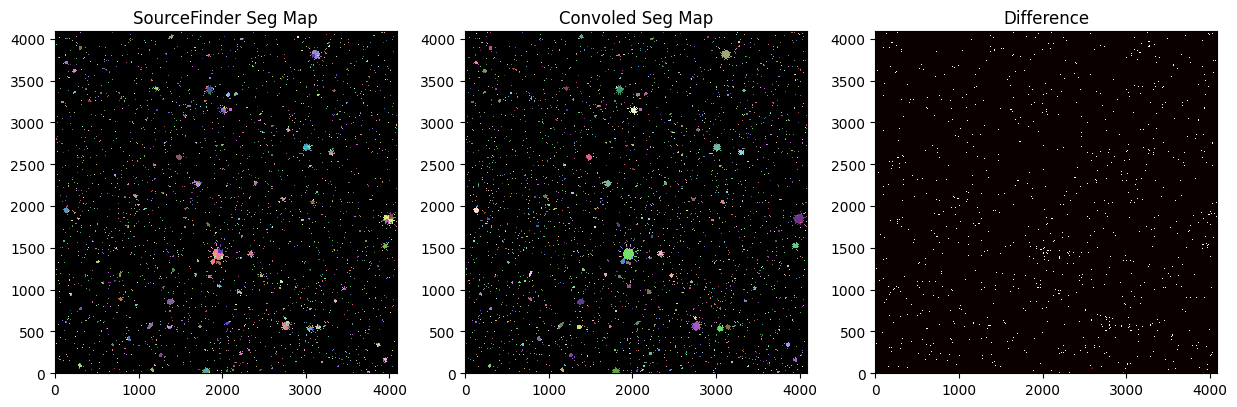

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))

ax1.imshow(found_seg, cmap=found_seg.cmap, interpolation='nearest', origin='lower')
ax1.set_title("SourceFinder Seg Map")

ax2.imshow(found_convolved_seg, cmap=found_convolved_seg.cmap, interpolation='nearest', origin='lower')
ax2.set_title("Convoled Seg Map")

ax3.imshow(found_convolved_seg.data - found_seg.data, vmin=0.2, vmax=4, cmap='hot', interpolation='nearest', origin='lower')
ax3.set_title("Difference")